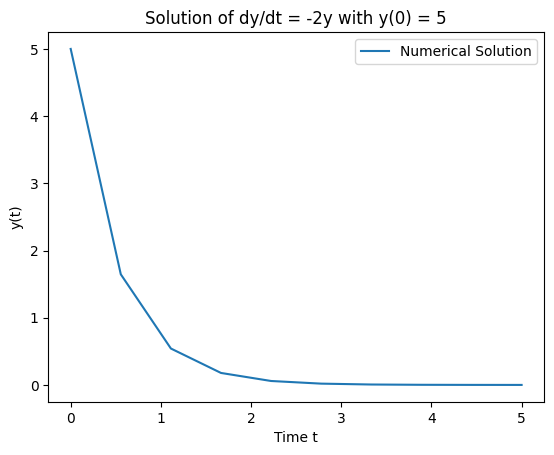

In [4]:
import torch
from torchdiffeq import odeint
import matplotlib.pyplot as plt

# 定義: ODEの右辺 dy/dt = -2y
def func(t, y):
    return -2 * y

# 初期値 y(0) = 5
y0 = torch.tensor([5.0])

# 時刻のリスト: 0 から 5 の範囲で 100 個の点
t = torch.linspace(0, 5, 10)

# 数値解
solution = odeint(func, y0, t)

# 可視化
plt.plot(t.numpy(), solution.numpy(), label="Numerical Solution")
plt.xlabel("Time t")
plt.ylabel("y(t)")
plt.title("Solution of dy/dt = -2y with y(0) = 5")
plt.legend()
plt.show()

In [5]:
import torch
import torch.nn as nn

In [6]:
def sigma(t):
    # 例えばシンプルに sigma(t) = t としてみる (実際の問題に合わせて定義)
    return t

def dsigma_dt(t):
    # sigma(t) = t のときは d sigma(t)/dt = 1
    return 1.0

class EpsTheta(nn.Module):
    def __init__(self):
        super().__init__()
        # 必要に応じてパラメータなどを定義
    def forward(self, x):
        # ここでは単純に入力をそのまま返す
        return x
    
class ODEFunc(nn.Module):
    def __init__(self, eps_theta):
        super().__init__()
        self.eps_theta = eps_theta

    def forward(self, t, x):
        # x の形状: (batch_size, ...) であってもOK
        s = sigma(t)                         # sigma(t)
        ds = dsigma_dt(t)                    # d sigma(t)/dt
        # dx/dt = eps_theta(x / sqrt(1 + s^2)) * ds
        return self.eps_theta(x / torch.sqrt(1.0 + s*s)) * ds


In [7]:
def solve_ode(x0, eps_theta, t_span=[0., 1.]):
    """
    x0: 初期値 (torch.Tensor)
    eps_theta: 上で定義した EpsTheta のインスタンスなど
    t_span: [t0, t1]
    """
    # 時間点を定義 (ここでは t=0 と t=1 のみ)
    t_eval = torch.tensor(t_span, dtype=torch.float32)

    # ODEFunc のインスタンスを生成
    ode_func = ODEFunc(eps_theta)

    # odeint により数値解を求める
    # 解のテンソル shape: (len(t_eval), *x0.shape)
    sol = odeint(ode_func, x0, t_eval, method='dopri5')
    
    # sol[0] は t=0 の解 (初期値と同じ)
    # sol[-1] が t=1 での解
    return sol[-1]

x0 = torch.tensor([0.5])
eps = EpsTheta()
x_t1 = solve_ode(x0, eps)
x_t1

tensor([1.2071])